In [1]:
import cv2
import numpy as np 
import torch 
from torchvision import transforms, models 
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torchvision


In [2]:
resnet_model = models.resnet50(pretrained = True)

/usr/local/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
from torchvision import transforms

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [5]:
from sklearn.cluster import KMeans

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
print(cv2.__version__)

4.6.0


In [8]:
#dataset = torchvision.datasets.Caltech101('/Users/niteeqsheik/Desktop/CSE515-Project(Git)',download=True)
dataset = torchvision.datasets.Caltech101('/Users/hitaximistry/Courses/515 MWDB', download=True)
data_loader = torch.utils.data.DataLoader(dataset,
batch_size=4,
shuffle=True,
num_workers=8)
print(len(dataset))

131740031it [00:04, 27020481.39it/s]


Extracting /Users/hitaximistry/Courses/515 MWDB/caltech101/101_ObjectCategories.tar.gz to /Users/hitaximistry/Courses/515 MWDB/caltech101


14028800it [00:00, 29838140.59it/s]


Extracting /Users/hitaximistry/Courses/515 MWDB/caltech101/Annotations.tar to /Users/hitaximistry/Courses/515 MWDB/caltech101
8677


In [9]:
from skimage.io import imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt

This is ID:8000
label:92


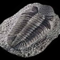

In [10]:
image_ID =8000
img, label = dataset[image_ID]
print(f'This is ID:{image_ID}')
print(f'label:{label}')
newsize = (60, 60)
img = img.resize(newsize)
display(img)

In [11]:
labels_caltech_101 = np.array([dataset[i][1] for i in range(len(dataset))])

In [12]:
print(labels_caltech_101[8676])

100


In [13]:
from PIL import Image
from torchvision import datasets
import torch
import numpy as np
from scipy.stats import skew
import csv
from tqdm import tqdm

# Initialize an empty list to store color moments
color_moments_list = []

# Initialize an empty list to store img_arrays (if needed)
all_img_arrays = []

# Loop through the dataset
for image_ID in tqdm(range(len(dataset))):
    img, label = dataset[image_ID]
    
    # Step 1: Resize the image to 300x100
    new_size = (300, 100)
    img_resized = img.resize(new_size)
    
    # Convert the PIL Image to a NumPy array
    img_array = np.array(img_resized)
    
    #grayscale image check 
    is_gray = len(img_array.shape) == 2
    
    # Append the img_array to the list (if you need to keep all arrays)
    all_img_arrays.append(img_array)

    # Step 2: Partition the image into a 10x10 grid
    for i in range(0, 300, 30):
        for j in range(0, 100, 10):
            grid_cell = img_array[j:j+10, i:i+30]
            
            # Step 3: Calculate the color moments for each grid cell
            color_moments_dict = {}
            for color_channel, color_name in enumerate(['Gray'] if is_gray else ['Red', 'Green', 'Blue']):
                channel_data = grid_cell if is_gray else grid_cell[:, :, color_channel]

                # Calculate mean, standard deviation, and skewness
                channel_mean = np.mean(channel_data)
                channel_std = np.std(channel_data)
                if np.all(channel_data == channel_data[0]):
                    channel_skewness = 0
                else :
                    channel_skewness = skew(channel_data.reshape(-1))
                
                # Store the color moments in the dictionary
                color_moments_dict[f"{color_name}_Mean"] = channel_mean
                color_moments_dict[f"{color_name}_Std"] = channel_std
                color_moments_dict[f"{color_name}_Skewness"] = channel_skewness
            
            # Include the ImageID
            color_moments_dict["ImageID"] = image_ID
            
            # Append the color moments to the list
            color_moments_list.append(color_moments_dict)

 18%|█▊        | 1544/8677 [02:07<09:48, 12.11it/s]


KeyboardInterrupt: 

#### Use hog_features_dict as the feature matrix

In [120]:
from torchvision import datasets
from skimage.feature import hog
from skimage.color import rgb2gray
from skimage.transform import resize
from PIL import Image
import numpy as np
from tqdm import tqdm

# Assuming you've already loaded the dataset like this:
# dataset = datasets.Caltech101('/path/to/dataset', download=True)

def extract_hog_features(image):
    # Convert PIL Image to NumPy array
    image_np = np.array(image)
    
    # Check if the image is grayscale
    if len(image_np.shape) == 2:
        gray_image = image_np
    else:
        gray_image = rgb2gray(image_np)
    
    # Resize the image
    resized_image = resize(gray_image, (300, 100))
    
    # Compute the HOG features
    features, hog_image = hog(resized_image, orientations=9, pixels_per_cell=(30, 10),
                              cells_per_block=(1, 1), visualize=True)
    
    return features, hog_image

# Initialize empty dictionaries to store features and labels
hog_features_dict = {}
hog_images_dict = {}
labels_dict = {}

# Loop over the dataset with progress bar
for i in tqdm(range(len(dataset)), desc="Extracting HOG features"):
    image, label = dataset[i]
    features, hog_image = extract_hog_features(image)
    hog_features_dict[i] = features
    hog_images_dict[i] = hog_image
    labels_dict[i] = label

# Now:
# hog_features_dict contains the 900-dimensional feature descriptor for each image, indexed by dataset index
# hog_images_dict contains the visual representation of the HOG features for each image, indexed by dataset index
# labels_dict contains the label for each image, indexed by dataset index


Extracting HOG features: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 8677/8677 [01:09<00:00, 125.43it/s]


In [176]:
print(len(hog_features_dict))

8677


In [122]:
print(len(color_moments_list))

867700


In [50]:
# Resnet computations 
from torchvision import models, transforms
from PIL import Image
import torch
import numpy as np
from tqdm import tqdm

transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize([0.53994344, 0.52009986, 0.49254049], 
                         [0.31415099, 0.30712622, 0.31878401]),  # Normalize the images
])

def resnet_computations(hook_layer, dataset):
    
    # List to store the output tensors for each image along with their ImageID
    outputs_with_ids = []
    skipped_images = []
    
    # List to temporarily capture the output tensor from the hook
    captured_output = [None]

    # Hook function to capture the output tensor of a specified layer
    def capture_output(module, input, output):
        captured_output[0] = output

    # Register the hook function to the specified layer
    if hook_layer == 'avgpool':
        hook = resnet_model.avgpool.register_forward_hook(capture_output)
    elif hook_layer == 'layer3':
        hook = resnet_model.layer3.register_forward_hook(capture_output)
    elif hook_layer == 'fc':   
        hook = resnet_model.fc.register_forward_hook(capture_output)

    # Loop through the dataset
    for i in tqdm(range(len(dataset))):
        try:
            img, label = dataset[i]
            #skipping grayscale images 
            if img.mode == 'L' or img.mode == '1':
                img = img.convert("RGB")

            # Apply transformations and prepare image batch
            img_tensor = transform(img)
            img_batch = img_tensor.unsqueeze(0)  # Add a batch dimension

            # Forward pass (disable gradient computation to save memory)
            with torch.no_grad():
                resnet_model(img_batch)
            
            # Retrieve the captured output tensor
            resnet_output = captured_output[0]
            if resnet_output is None:
                print("Warning: Hook Not Triggered")
                skipped_images.append(i)
                continue

            # Process the output tensor depending on the specified layer and store it in a dictionary
            output_dict = {"ImageID": i}
            if hook_layer == 'avgpool':
                avgpool_output = resnet_output.flatten().cpu().numpy()
                averaged_values = [(avgpool_output[i] + avgpool_output[i+1]) / 2.0 for i in range(0, len(avgpool_output), 2)]
                output_dict["Output"] = np.array(averaged_values)
            elif hook_layer == 'layer3':
                avg_vector = resnet_output.mean(dim=[2, 3]).cpu().numpy().squeeze()
                output_dict["Output"] = avg_vector
            elif hook_layer == 'fc':
                output_dict["Output"] = resnet_output.cpu().numpy().squeeze()
            
            # Append the dictionary to the list
            outputs_with_ids.append(output_dict)
        except Exception as e:
            print(f"Error processing ImageID {i}: {e}")
            skipped_images.append(i)
    # Remove the hook to free resources
    hook.remove()
    
    return outputs_with_ids

#### Avg_pool

In [ ]:
import pandas as pd

In [51]:
output_avgpool_with_ids = resnet_computations('avgpool',dataset)

100%|██████████| 8677/8677 [19:56<00:00,  7.25it/s]


In [74]:
print(len(output_avgpool_with_ids))

8677


In [75]:
output_avgpool_with_ids

[{'ImageID': 0,
  'Output': array([0.44895375, 0.44785607, 0.49550653, ..., 0.35910362, 0.41963935,
         0.37226075])},
 {'ImageID': 1,
  'Output': array([0.48310378, 0.44318217, 0.52206612, ..., 0.35708725, 0.37310323,
         0.40823042])},
 {'ImageID': 2,
  'Output': array([0.4802826 , 0.45803925, 0.52800548, ..., 0.34907159, 0.38632497,
         0.39210802])},
 {'ImageID': 3,
  'Output': array([0.49162343, 0.51395267, 0.54151171, ..., 0.32323495, 0.40741926,
         0.39072478])},
 {'ImageID': 4,
  'Output': array([0.45302656, 0.47661406, 0.5138427 , ..., 0.35542548, 0.38494557,
         0.41618937])},
 {'ImageID': 5,
  'Output': array([0.47108817, 0.41928256, 0.49525183, ..., 0.33714622, 0.36875129,
         0.38093901])},
 {'ImageID': 6,
  'Output': array([0.48503762, 0.4528695 , 0.51839393, ..., 0.35931939, 0.37974483,
         0.38002223])},
 {'ImageID': 7,
  'Output': array([0.48467094, 0.47358501, 0.52783442, ..., 0.35951394, 0.38327035,
         0.38667184])},
 {'Image

In [76]:
#converting into a dataframe
df_output_avgpool_with_ids = pd.DataFrame(output_avgpool_with_ids)

In [77]:
df_output_avgpool_with_ids.to_csv('output_avgpool_with_ids.csv')

#### Layer 3

In [93]:
output_layers3_with_ids = resnet_computations('layer3',dataset)

100%|██████████| 8677/8677 [19:19<00:00,  7.48it/s]  


In [94]:
print(len(output_layers3_with_ids))

8677


In [96]:
output_layers3_with_ids

[{'ImageID': 0,
  'Output': array([0.12078654, 0.02287459, 0.01806708, ..., 0.03785517, 0.04791824,
         0.05751837], dtype=float32)},
 {'ImageID': 1,
  'Output': array([0.11209615, 0.02596925, 0.03309018, ..., 0.03476803, 0.04299933,
         0.04503124], dtype=float32)},
 {'ImageID': 2,
  'Output': array([0.12036339, 0.02806881, 0.02604474, ..., 0.03694218, 0.05911653,
         0.06102999], dtype=float32)},
 {'ImageID': 3,
  'Output': array([0.11110722, 0.02568895, 0.03132373, ..., 0.02917186, 0.04254684,
         0.04521417], dtype=float32)},
 {'ImageID': 4,
  'Output': array([0.11334121, 0.01933987, 0.02014158, ..., 0.03059965, 0.05593635,
         0.0596719 ], dtype=float32)},
 {'ImageID': 5,
  'Output': array([0.11550345, 0.01787795, 0.02930467, ..., 0.0319954 , 0.04078703,
         0.03975392], dtype=float32)},
 {'ImageID': 6,
  'Output': array([0.10834079, 0.01811359, 0.03108888, ..., 0.02738596, 0.04171859,
         0.05524234], dtype=float32)},
 {'ImageID': 7,
  'Output':

In [97]:
#converting into a dataframe
df_output_layer3_with_ids = pd.DataFrame(output_layers3_with_ids)

In [98]:
df_output_layer3_with_ids.to_csv('output_layer3_with_ids.csv')

#### FC

In [101]:
output_fc_with_ids = resnet_computations('fc',dataset)

100%|██████████| 8677/8677 [20:08<00:00,  7.18it/s]


In [102]:
print(len(output_fc_with_ids))

8677


In [103]:
#converting into a dataframe
df_output_fc_with_ids = pd.DataFrame(output_fc_with_ids)

In [104]:
df_output_fc_with_ids.to_csv('output_fc_with_ids.csv')

In [14]:
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans

In [15]:
from tqdm import tqdm

In [40]:
import pandas as pd 
# df_color_moments = pd.read_csv("color_moments_with_imageID.csv")
df_color_moments = pd.read_csv("color_moments.csv")

In [41]:
print(len(df_color_moments))

867700


In [42]:
feature_columns = df_color_moments.columns[1:-1]
data_color_moments = df_color_moments[feature_columns].values

In [19]:
print(feature_columns)

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '890', '891', '892', '893', '894', '895', '896', '897', '898', '899'],
      dtype='object', length=900)


In [20]:
print(data_color_moments[0]) 

[ 0.          0.39611763  0.14532204  0.04633036  0.5113334   0.07610854
 -0.05781807  0.48560786  0.12035327 -0.13233223  0.37670588  0.21648468
  0.06062868  0.6256863   0.09976423 -0.10890458  0.64172554  0.0724536
  0.05222476  0.70250994  0.0886084  -0.12836252  0.5999608   0.10680859
 -0.11045083  0.65878433  0.01631575 -0.01268823  0.6051372   0.01965246
 -0.0148148   0.41870585  0.11521254  0.05750076  0.51980394  0.07615598
 -0.04390166  0.49898043  0.09692723 -0.09800339  0.4181177   0.232768
 -0.15418811  0.63443136  0.0949596  -0.07699628  0.49164712  0.16330652
 -0.1279605   0.28662747  0.09291238  0.13860928  0.258       0.11376645
  0.13872215  0.5612942   0.1104514  -0.11665145  0.6094117   0.01723707
 -0.01264516  0.4208235   0.14660972  0.08389402  0.606       0.10960551
 -0.06735996  0.6277647   0.14095372  0.06802572  0.43333337  0.32036528
  0.21277091  0.792157    0.12083777 -0.08233113  0.37086278  0.18404675
  0.21266732  0.31541178  0.12941563  0.15166351  0.34

In [21]:
from sklearn.decomposition import TruncatedSVD

In [22]:
k = 5 
svd = TruncatedSVD(n_components = k)
latent_semantics = svd.fit_transform(data_color_moments)
print("Reduced Data:(Latent Semantics)")
print(latent_semantics)

Reduced Data:(Latent Semantics)
[[ 1.50940717e-02  9.16020772e+00  2.57661283e+00  3.42788012e-02
  -7.60845415e-01]
 [ 1.01182262e+00  7.12202330e+00  2.11886752e+00 -3.77560766e-01
  -6.74118223e-01]
 [ 2.01742379e+00  1.07895999e+01  4.36188140e-01  2.44303177e+00
  -1.08266867e+00]
 ...
 [ 8.67200276e+03 -5.09756048e+00 -9.00173444e-01 -3.46414686e-01
  -1.46948388e-01]
 [ 8.67400737e+03 -2.15644649e+00 -2.34933989e+00  1.77340952e+00
   8.69424927e-01]
 [ 8.67600896e+03 -9.77618555e-01 -3.39779918e+00  1.42781868e+00
  -2.79424395e-01]]


In [23]:
def SVD_calc(feature_matrix,k):
    #print("Enter SVD calc")
    svd = TruncatedSVD(n_components=k)
    latent_semantics = svd.fit_transform(feature_matrix)
    #print("The latent semantics are:")
    print(latent_semantics)
    return latent_semantics

In [24]:
from sklearn.decomposition import NMF 

In [25]:
def NMF_calculator(feature_matrix,k):
    nmf = NMF(n_components=k)
    W = nmf.fit_transform(feature_matrix)
    H = nmf.components_
    return H 

In [26]:
def LDA_calculator(feature_matrix,k):
    lda = LinearDiscriminantAnalysis(n_components = k)
    lda_result = lda.fit_transform(feature_matrix,labels_caltech_101)
    top_k_latent = lda.scalings_[:, :k]
    return top_k_latent
    

In [27]:
def k_means_calculator(feature_matrix,k):
    kmeans = KMeans(n_clusters = k,random_state=0)
    kmeans.fit(feature_matrix)
    top_k_latent_semantics = kmeans.cluster_centers_
    return top_k_latent_semantics

## Below Is the Code Of Block of converting the Phase 1 results into feature matrices

In [35]:
# import pandas as pd 
# df_color_moments = pd.read_csv("color_moments_with_imageID.csv")
df_color_moments = pd.read_csv("color_moments.csv")
feature_columns = df_color_moments.columns[1:-1]
data_color_moments = df_color_moments[feature_columns].values
print(feature_columns)
print(data_color_moments[0]) 

Index(['Red_Std', 'Red_Skewness', 'Green_Mean', 'Green_Std', 'Green_Skewness',
       'Blue_Mean', 'Blue_Std', 'Blue_Skewness', 'ImageID', 'Gray_Mean',
       'Gray_Std'],
      dtype='object')
[4.14187558e+01 1.60854381e-01 9.92433333e+01 4.50077488e+01
 1.72475273e-01 9.40433333e+01 4.68119798e+01 1.16108966e-01
 0.00000000e+00 1.49737241e+02 3.28477352e+01]


#### In the Below code block use data_color_moments as the feature matrix for SVD 
#### Use the X_color_moments for NMF and X_standardized_color_moments for remaining

In [37]:

import pandas as pd 
#color_moments_df = pd.DataFrame(color_moments_list)
# df_color_moments is used from .csv 
#color_moments_df.fillna(color_moments_df.mean(), inplace=True)
#data_color_moments= color_moments_df.drop(columns="ImageID").to_numpy()
df_color_moments.fillna(df_color_moments.mean(),inplace=True)
#data_color_moments= df_color_moments.drop(columns="ImageID").to_numpy()
data_color_moments = df_color_moments.to_numpy()
n_grids_per_image = 10 * 10  # 10x10 grid for each image
n_features_per_grid = data_color_moments.shape[1]
X_color_moments = data_color_moments.reshape(len(dataset), n_grids_per_image * n_features_per_grid)


In [36]:
print(df_color_moments.shape)

(867700, 13)


In [38]:
scaler_2 = StandardScaler()
X_standardized_color_moments = scaler_2.fit_transform(X_color_moments)

In [166]:
#print(X_standardized_color_moments[0])

In [39]:
print(len(X_color_moments))

8677


#### Use X_hog for nmf and X_hog_standardized for remaining

In [43]:
X_hog = pd.read_csv("hog_features.csv")
#X_hog = np.array(list(hog_features_dict.values()))
scaler = StandardScaler()
X_hog_standardized = scaler.fit_transform(X_hog)


In [44]:
print(X_hog_standardized[0])

[ 1.10490906  0.51011059 -0.64562166 -0.70825492 -0.40797974  0.04233549
 -0.55277122 -0.29158507  1.28645061 -0.02577787 -0.00760388 -0.28950236
  1.26987394  0.54256548  0.96832095  1.31661189  0.49924966  0.19149429
  0.78627109 -0.48219852 -0.32819001  0.03103941  0.39932613  0.85617725
  0.38028818 -0.2986807   1.01060878  0.4612698   0.30854947  0.42932824
  0.11945134  0.52687369  0.38275728  0.18780985 -0.21817284  0.63070959
  0.34064835  0.3681613   0.08635582  0.17175556  0.57700791  0.93409781
  0.20416583 -0.39289205  0.46396703  0.49093749  0.21085344 -0.07041392
  0.06080874  0.66901956  0.80446357 -0.56847428 -0.07178494  0.56889353
  0.34181961  1.05797044  1.45022072  1.49927162  0.60768182 -1.40656229
 -1.15195536 -0.92355779 -0.40578004  1.16392179 -0.60538689 -0.58197395
 -0.69150762 -0.45611673 -0.85094698 -0.04822689  0.95533141  1.16649146
  0.33692427  0.59358182  0.3718841   0.0866002   0.76888602 -0.15934369
 -0.62093559  0.94765014  0.32349877  0.60648729  0

#### Feature Matrix Conversion of Resnet computations

In [105]:
X_resnet_avgpool = np.array([entry["Output"] for entry in output_avgpool_with_ids])
X_resnet_layers3 = np.array([entry["Output"] for entry in output_layers3_with_ids])
X_resnet_fc = np.array([entry["Output"] for entry in output_fc_with_ids])


In [81]:
X_resnet_avgpool

array([[0.44895375, 0.44785607, 0.49550653, ..., 0.35910362, 0.41963935,
        0.37226075],
       [0.48310378, 0.44318217, 0.52206612, ..., 0.35708725, 0.37310323,
        0.40823042],
       [0.4802826 , 0.45803925, 0.52800548, ..., 0.34907159, 0.38632497,
        0.39210802],
       ...,
       [0.46364391, 0.46292925, 0.44657689, ..., 0.29694653, 0.39511675,
        0.44342834],
       [0.47028863, 0.44244394, 0.51651132, ..., 0.33033514, 0.39612582,
        0.41623667],
       [0.44100702, 0.4380511 , 0.5426693 , ..., 0.30357498, 0.36185163,
        0.41253135]])

In [106]:
print(len(X_resnet_layers3))

8677


#### Use X_resnet_{layer_value} for NMF and X_standardized_resnet_{layer_value} for remaining reduction technique

In [63]:
data_resnet_avgpool = X_resnet_avgpool.drop(columns="ImageID").to_numpy()

In [64]:
data_resnet_avgpool

array([[0,
        '[0.44895375 0.44785607 0.49550653 ... 0.35910362 0.41963935 0.37226075]'],
       [1,
        '[0.48310378 0.44318217 0.52206612 ... 0.35708725 0.37310323 0.40823042]'],
       [2,
        '[0.4802826  0.45803925 0.52800548 ... 0.34907159 0.38632497 0.39210802]'],
       ...,
       [8674,
        '[0.46364391 0.46292925 0.44657689 ... 0.29694653 0.39511675 0.44342834]'],
       [8675,
        '[0.47028863 0.44244394 0.51651132 ... 0.33033514 0.39612582 0.41623667]'],
       [8676,
        '[0.44100702 0.4380511  0.5426693  ... 0.30357498 0.36185163 0.41253135]']],
      dtype=object)

In [107]:
#Standardizing the data 
scaler_1 = StandardScaler()
#X_resnet_avgpool = X_resnet_avgpool
X_standardized_resnet_avgpool = scaler_1.fit_transform(X_resnet_avgpool)
X_standardized_resnet_layers3 = scaler_1.fit_transform(X_resnet_layers3)
X_standardized_resnet_fc = scaler_1.fit_transform(X_resnet_fc)

In [69]:
print(len(X_standardized_resnet_avgpool))

8677


In [70]:
print(X_standardized_resnet_avgpool[0])

[-0.41668856 -0.04905405 -1.04495605 ...  2.17292646  1.55845621
 -1.13828173]


In [132]:
# We have [X_standardized_color_moments, X_hog_standardized, X_standardized_resnet_avgpool, X_standardized_resnet_layers3, X_standardized_resnet_fc ]
print(X_standardized_color_moments)

[[-0.51070834  0.97250386  0.20284517 ... -0.01936872  0.14289639
  -0.00994879]
 [-1.4884727  -0.16098861  0.57237246 ... -0.01936872  0.14289639
  -0.00994879]
 [ 1.03460958  0.42400265 -0.36569498 ... -0.01936872  0.14289639
  -0.00994879]
 ...
 [ 0.36060572 -0.20947002  0.05117154 ... -0.01936872  0.14289639
  -0.00994879]
 [-0.06865358  0.46078603  0.01183651 ...  5.91513148 -5.32592129
   0.87461598]
 [ 1.27616391 -0.80352037  0.11802591 ... -0.01936872  0.14289639
  -0.00994879]]


##  Create the UI here and call appropriate functions


In [108]:
def get_feature_model_data(feature_model):
    if feature_model == "Color Moments":
        X_data = X_color_moments
        X_standardized = X_standardized_color_moments
    elif feature_model == "HOG Descriptor":
        X_data = X_hog
        X_standardized = X_hog_standardized
    elif  feature_model == "Resnet FC":
        X_data = X_resnet_fc
        X_standardized = X_standardized_resnet_fc
    elif feature_model == "Resnet Avgpool":
        X_data = X_resnet_avgpool
        X_standardized= X_standardized_resnet_avgpool 
    elif feature_model == "Resnet Layer 3":
        X_data = X_resnet_layers3
        X_standardized= X_standardized_resnet_layers3
    else:
        return -1
    return X_data,X_standardized
        

In [109]:
def dimensionality_reduction(X_data,X_standardized,technique,k):
    if technique == 'SVD':
        #print("Entered SVD")
        result = SVD_calc(X_standardized,k)
    elif technique == 'NNMF':
        result = NMF_calculator(X_data,k)
    elif technique =='LDA':
        result = LDA_calculator(X_standardized,k)
    elif technique == 'k-means':
        result = k_means_calculator(X_standardized,k)
    else :
        return -1
    return result

In [170]:
def main():
    #Select a Feature Model
    # Prompt user for feature model
    print("Choose a feature model:")
    print("1. Color Moments")
    print("2. HOG Descriptor")
    print("3. Resnet FC")
    print("4. Resnet Avgpool")
    print("5. Resnet Layer 3")
    feature_model_choice = input("Enter your choice(number): ")
    # Convert choice to string name
    feature_model = ["Color Moments", "HOG Descriptor", "Resnet FC", "Resnet Avgpool", "Resnet Layer 3"][int(feature_model_choice) - 1]
    #print(feature_model)
    X_data, X_standardized_data = get_feature_model_data(feature_model)
    #Select the Dimensionality Reduction Technique 
    k = int(input('Please Enter the value of k'))
    # Prompt user for dimensionality reduction technique
    print("\nChoose a dimensionality reduction technique:")
    print("1. SVD")
    print("2. NNMF")
    print("3. LDA")
    print("4. k-means")
    technique_choice = input("Enter your choice: ")
    #Convert choice to specified string 
    technique = ["SVD", "NNMF", "LDA", "k-means"][int(technique_choice) - 1]
    result = dimensionality_reduction(X_data,X_standardized_data,technique,k,)
    print(f"top {k} latent-semantics of {feature_model} using {technique}")
    print(result)
    #converting into a dataframe
    result_df = pd.DataFrame(result)
    result_df.to_csv('T3-HOG-10-k-means.csv')


In [171]:
main()

Choose a feature model:
1. Color Moments
2. HOG Descriptor
3. Resnet FC
4. Resnet Avgpool
5. Resnet Layer 3

Choose a dimensionality reduction technique:
1. SVD
2. NNMF
3. LDA
4. k-means
top 10 latent-semantics of HOG Descriptor using k-means
[[-1.06122935 -0.89913425 -0.86328461 ... -0.91059086 -1.09464856
   0.5536918 ]
 [ 1.20920815 -0.78741253 -0.81975198 ... -0.45327398  1.09250127
  -0.66478577]
 [ 0.14695079  0.30389023  0.43332665 ...  0.96614716  0.09193512
  -1.20097561]
 ...
 [ 0.57061865 -0.25842382 -0.2538391  ... -0.61367146  0.58937243
  -0.38619807]
 [ 0.41271651  0.31285714  0.1185421  ...  0.51527654  0.54040052
  -0.42374942]
 [-1.01251559 -0.81680712 -0.78152281 ... -0.96850681 -1.10007996
   0.75551481]]


### Task 7

##### Given ImageId or Image filename, user selected latent semantic and k -> K most similar images + scores

In [112]:
import torch.nn as nn

In [118]:
image_name = '/Users/hitaximistry/Courses/515 MWDB/Data/101_ObjectCategories/airplanes/image_0002.jpg'
# print(dataset.categories)

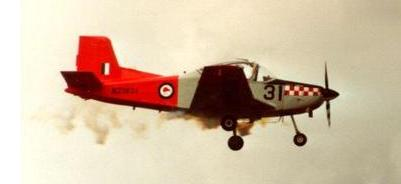

In [276]:
from PIL import Image
Image.open(image_name)

In [257]:
# Find image label from it's image_id
img, label = dataset[8676]
print(label)
print(dataset.categories[label])

100
yin_yang


In [119]:
# Split the path by the '/' character and get the last part
path_parts = image_name.split('/')
category = path_parts[-2]

print(category)  # This will print 'airplanes'

airplanes


In [258]:
## Find the label of image from image_id
img_id = 2500
img, label = dataset[img_id]
print(label, dataset.categories[label])

5 airplanes


This is ID:2500
label:5


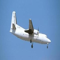

In [178]:
print(f'This is ID:{img_id}')
print(f'label:{label}')
newsize = (60, 60)
img = img.resize(newsize)
display(img)

## TASK 7 ::::

In [ ]:
## T3-CM-5-SVD; T4-RESNET-5} ; k=10

In [115]:
# Enter the image_id and k values
image_id_visualize = int(input("Plese enter the image_id / image filename you want to visualize: "))
# Prompt user for dimensionality reduction technique
print("\nChoose a dimensionality reduction technique:")
print("1. SVD")
print("2. NNMF")
print("3. LDA")
print("4. k-means")
latent_semantic_choice = int(input("Enter your choice: "))
k = int(input("Please enter the number of similar images you want: "))


Choose a dimensionality reduction technique:
1. SVD
2. NNMF
3. LDA
4. k-means


In [358]:
print(image_id_visualize, latent_semantic_choice, k)

0 0 5


In [197]:
df_latent = pd.read_csv('T3-CM-5-SVD.csv')

In [198]:
df_latent

,Index,0,1,2,3,4
0,0,-0.210783,-16.125309,2.150351,-6.377640,5.378142
1,1,7.611408,-17.063801,2.503314,2.413059,8.712171
2,2,-6.461783,-15.689430,2.104266,-2.733490,2.599816
3,3,10.908503,-17.556828,2.590295,-0.787818,3.900892
4,4,5.732616,-16.217858,2.110854,-6.342933,0.498147
...,...,...,...,...,...,...
8672,8672,-2.502771,15.643092,-2.041544,17.646733,0.446235
8673,8673,1.660911,23.204787,24.877828,-2.896563,7.195529
8674,8674,-9.774253,18.200898,-2.899237,4.326933,-7.931768
8675,8675,1.594635,22.874570,9.300416,-1.492958,6.035416


In [370]:
# Assuming df_latent is your DataFrame and 'ImageID' is the column containing image IDs
image_id_visualize = 0
filtered_df = df_latent[df_latent['Index'] == image_id_visualize]

# Access values of columns starting from the third column
values = filtered_df.iloc[:, 1:].values


In [371]:
# Define a function to compute the similarity score between two latent representations
def similarity_score(latent1, latent2):
    return torch.cosine_similarity(latent1, latent2)

In [372]:
q_img_latent = df_latent[df_latent['Index']== image_id_visualize].iloc[:,1:].values

In [350]:
img_latent = df_latent[df_latent['Index']== 321].iloc[:,1:].values

In [351]:
img_latent

array([[-10.46873628, -14.2206687 ,   1.81809888,  -6.82801106,
          5.26002471]])

In [373]:
from scipy.spatial.distance import cosine

In [374]:
v1 = img_latent.flatten()
v2 = q_img_latent.flatten()

In [359]:
#k=10

In [240]:
#sim_1 = similarity_score(q_img_latent, img_latent)
# Compute cosine similarity
cosine_similarity = 1 - cosine(v1, v2)

print(f"Cosine Similarity: {cosine_similarity}")

Cosine Similarity: 0.5314754027161214


In [375]:
from scipy.spatial.distance import cosine
q_img_latent = df_latent[df_latent['Index']== image_id_visualize].iloc[:,1:].values

sim_score = []
for i in range(8677):
    img_latent = df_latent[df_latent['Index']== i].iloc[:,1:].values
    v1 = img_latent.flatten()
    v2 = q_img_latent.flatten()
    cosine_similarity = 1 - cosine(v1, v2)
    sim_score.append(cosine_similarity)

In [376]:
#sim_score
sorted_indices = np.argsort(sim_score, axis=0)[::-1]

In [377]:
#sorted_indices
top_indices = sorted_indices[:k]
print(top_indices)

[  0 240 482 651 485 305 157 592 781 574]


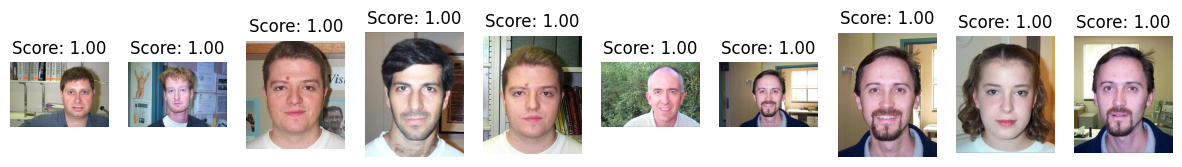

In [378]:
# Visualize the most similar images and their scores
plt.figure(figsize=(15, 5))
for i in range(k):
    id = top_indices[i]
    plt.subplot(1, k, i + 1)
    im, _ = dataset[id]
    plt.imshow(im)
    plt.title(f'Score: {sim_score[id]:.2f}')
    plt.axis('off')

plt.show()

In [367]:
print("\nFor latent semantic: Enter task#, which feature and how many latent dim and which dim reduction technique!")
t = int(input("Enter task#: "))
print("Choose a feature model:")
print("1. Color Moments")
print("2. HOG Descriptor")
print("3. Resnet FC")
print("4. Resnet Avgpool")
print("5. Resnet Layer 3")
fm = int(input("Enter feature model:"))
if fm == 1: 
    fm_str = "CM"
elif fm == 2:
    fm_str = "HOG"
elif fm == 3:
    fm_str = "FC"
elif fm == 4:
    fm_str = "AvgPool"
elif fm == 5:
    fm_str = "Layer3"
else:
    print("Enter valid number between 1 and 5")

ld = int(input("Enter # of latent dimensions:"))
print("\nChoose a dimensionality reduction technique:")
print("1. SVD")
print("2. NNMF")
print("3. LDA")
print("4. k-means")
dr = int(input("Enter dim reduction technique: "))
if dr == 1: 
    dr_str = "SVD"
elif dr == 2:
    dr_str = "NNMF"
elif dr == 3:
    dr_str = "LDA"
elif dr == 4:
    dr_str = "k-means"
else:
    print("Enter valid number between 1 and 4")

#latent_semantic_choice = int(input("Enter your choice: "))


For latent semantic: Enter task#, which feature and how many latent dim and which dim reduction technique!
Choose a feature model:
1. Color Moments
2. HOG Descriptor
3. Resnet FC
4. Resnet Avgpool
5. Resnet Layer 3

Choose a dimensionality reduction technique:
1. SVD
2. NNMF
3. LDA
4. k-means


In [368]:
## Create csv name based on user selections
csv_name = "T"+ str(t) + "-" + fm_str + "-" + str(ld) + "-" + dr_str + ".csv"

In [369]:
print(csv_name)

T3-CM-5-SVD.csv


## Task 8 :::

In [ ]:
## T5-AvgPool-5-NNMF; T6-L3-5-LDA}; k=10

In [ ]:
##### Given ImageId or Image filename, user selected latent semantic and k -> K most similar labels + scores

In [259]:
img, label = dataset[8676]
print(label)
print(dataset.categories[label])

100
yin_yang


This is ID:2500
label:100


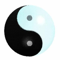

In [260]:
print(f'This is ID:{img_id}')
print(f'label:{label}')
newsize = (60, 60)
img = img.resize(newsize)
display(img)

In [272]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Enter the image_id and k values
image_id_visualize = int(input("Plese enter the image_id / image filename you want to visualize: "))
# Prompt user for dimensionality reduction technique
print("\nChoose a dimensionality reduction technique:")
print("1. SVD")
print("2. NNMF")
print("3. LDA")
print("4. k-means")
latent_semantic_choice = int(input("Enter your choice: "))
k = int(input("Please enter the number of similar images you want: "))

In [ ]:
print(image_id_visualize, latent_semantic_choice, k)

In [273]:
# Find the label names
labels = []
for i in range(len(dataset.categories)):
    labels.append(dataset.categories[i])

In [278]:
#labels

In [275]:
print(len(labels))

101


In [284]:
# Find label from image_id
img, q_label = dataset[image_id_visualize]
print(q_label)
print(dataset.categories[q_label])

5
airplanes


In [366]:
df_latent.iloc[:,1:].values

array([[ -0.21078346, -16.12530935,   2.15035122,  -6.37763991,
          5.37814226],
       [  7.61140783, -17.06380053,   2.50331433,   2.41305882,
          8.71217085],
       [ -6.46178311, -15.68942963,   2.10426572,  -2.7334898 ,
          2.59981565],
       ...,
       [ -9.77425327,  18.20089828,  -2.89923688,   4.32693256,
         -7.93176817],
       [  1.5946345 ,  22.87456969,   9.30041598,  -1.49295844,
          6.03541641],
       [-13.31457576,  17.50721921,  -2.64157534,   5.82296777,
         -7.99969148]])

In [279]:
import os

In [283]:
# Find label from image_path
image_name = '/Users/hitaximistry/Courses/515 MWDB/Data/101_ObjectCategories/airplanes/image_0002.jpg'
# print(dataset.categories)
# Extract the label from the directory structure
label_name = os.path.basename(os.path.dirname(image_name))

print("Label:", label_name)
q_label_no = 0
for i in range(len(labels)):
    if label_name == labels[i]:
        q_label_no = i

print(f"The label number for {label_name} is {q_label_no}")

Label: airplanes
The label number for airplanes is 5


In [285]:
# Load the required .csv file
df_latent = pd.read_csv('T3-CM-5-SVD.csv')

In [288]:
filtered_df = df_latent[df_latent['Index'] == image_id_visualize]

# Access values of columns starting from the third column
values = filtered_df.iloc[:, 1:].values

In [291]:
from scipy.spatial.distance import cosine
q_img_latent = df_latent[df_latent['Index']== image_id_visualize].iloc[:,1:].values

sim_score = []
for i in range(8677):
    img_latent = df_latent[df_latent['Index']== i].iloc[:,1:].values
    v1 = img_latent.flatten()
    v2 = q_img_latent.flatten()
    cosine_similarity = 1 - cosine(v1, v2)
    sim_score.append(cosine_similarity)

In [292]:
k = 5

In [313]:
kmeans_1 = KMeans(n_clusters=k, random_state=0).fit(df_latent.iloc[:, 1:].values)


In [315]:
c1 = kmeans_1.labels_

In [329]:
# Find the cluster label of the query image
query_image_cluster = kmeans_1.predict(df_latent[df_latent['Index'] == q_label_no].iloc[:, 1:].values)[0]


In [331]:
query_image_cluster

0

In [342]:
similar_labels = set()
categ = set()
for i in range(8677):
    if query_image_cluster == c1[i]:
        similar_labels.add(i)
        img, l = dataset[i]
        l1 = dataset.categories[l]
        categ.add(l1)


In [ ]:
img, q_label = dataset[image_id_visualize]
print(q_label)
print(dataset.categories[q_label])

In [338]:
len(similar_labels)

2732

In [343]:
categ

{'Faces',
 'Faces_easy',
 'Leopards',
 'Motorbikes',
 'accordion',
 'airplanes',
 'anchor',
 'ant',
 'barrel',
 'bass',
 'beaver',
 'binocular',
 'bonsai',
 'brain',
 'brontosaurus',
 'buddha',
 'butterfly',
 'camera',
 'cannon',
 'car_side',
 'ceiling_fan',
 'cellphone',
 'chair',
 'chandelier',
 'cougar_body',
 'cougar_face',
 'crab',
 'crayfish',
 'crocodile',
 'crocodile_head',
 'cup',
 'dalmatian',
 'dolphin',
 'electric_guitar'}

In [340]:
# Print the similar labels
#print("Labels in the Same Cluster as", q_label_no)
#print(similar_labels)

## Task 9 ::

##### Given label l, user selected latent semantic and k -> K most similar labels + scores

#### Implement a program which, given (a) a label l, (b) a user selected latent semantics, and (c) positive integer k, identifies and lists k most likely matching labels, along with their scores, under the selected latent space.

In [ ]:
## query label {0, 20, 100}; latent space {T3-RESNET-5-kmeans; T5-RESNET-5-kmeans}; k=10

In [ ]:
# Enter the parameters for this task
query_label = int(input("Please enter the query label: "))
k = int(input("Please enter the number of similar labels you want: "))
print("\nFor latent semantic: Enter task#, which feature and how many latent dim and which dim reduction technique!")
"""
print("1. SVD")
print("2. NNMF")
print("3. LDA")
print("4. k-means")
"""
t = int(input("Enter task#: "))
print("Choose a feature model:")
print("1. Color Moments")
print("2. HOG Descriptor")
print("3. Resnet FC")
print("4. Resnet Avgpool")
print("5. Resnet Layer 3")
fm = int(input("Enter feature model:"))
if fm == 1: 
    fm_str = "CM"
elif fm == 2:
    fm_str = "HOG"
elif fm == 3:
    fm_str = "FC"
elif fm == 4:
    fm_str = "AvgPool"
elif fm == 5:
    fm_str = "Layer3"
else:
    print("Enter valid number between 1 and 5")

ld = int(input("Enter # of latent dimensions:"))
print("\nChoose a dimensionality reduction technique:")
print("1. SVD")
print("2. NNMF")
print("3. LDA")
print("4. k-means")
dr = int(input("Enter dim reduction technique: "))
if dr == 1: 
    dr_str = "SVD"
elif dr == 2:
    dr_str = "NNMF"
elif dr == 3:
    dr_str = "LDA"
elif dr == 4:
    dr_str = "k-means"
else:
    print("Enter valid number between 1 and 4")

#latent_semantic_choice = int(input("Enter your choice: "))

In [ ]:
## Create csv name based on user selections
csv_name = "T"+ str(t) + "-" + fm_str + "-" + str(ld) + "-" + dr_str + ".csv"

In [ ]:
print(csv_name)

In [ ]:
# Print the user input parameters
print(query_label, csv_name, k)

In [ ]:
df_latent = pd.read_csv(csv_name)

In [ ]:
# Define a function to compute the similarity score between two latent representations
def similarity_score(latent1, latent2):
    return torch.cosine_similarity(latent1, latent2)

In [ ]:
from scipy.spatial.distance import cosine
q_img_latent = df_latent[df_latent['Index']== image_id_visualize].iloc[:,1:].values

sim_score = []
for i in range(8677):
    img_latent = df_latent[df_latent['Index']== i].iloc[:,1:].values
    v1 = img_latent.flatten()
    v2 = q_img_latent.flatten()
    cosine_similarity = 1 - cosine(v1, v2)
    sim_score.append(cosine_similarity)

## Task 10 ::

In [ ]:
## {0, 20, 100};   alt. latent space {T4-HOG-5; T6-RESNET-5-SVD}; k=10

##### Given label l, user selected latent semantic and k -> K most similar images + scores